In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 读取当前文件夹下的Excel文件
df = pd.read_excel('画图.xlsx', 'Sheet2', header=None)
x_labels = pd.read_excel('画图.xlsx', 'x_labels', header=None)
y_labels = pd.read_excel('画图.xlsx', 'y_labels', header=None)
x2_labels = pd.read_excel('画图.xlsx', 'x2_labels', header=None)
y2_labels = pd.read_excel('画图.xlsx', 'y2_labels', header=None)

# 如果标签是从Excel读取的DataFrame，需要将其转换为列表
y_labels = y_labels.squeeze().tolist()  # 将y_labels转换为列表
x_labels = x_labels.squeeze().tolist()  # 将x_labels转换为列表
y2_labels = y2_labels.squeeze().tolist()  # 将y2_labels转换为列表
x2_labels = x2_labels.squeeze().tolist()  # 将x2_labels转换为列表

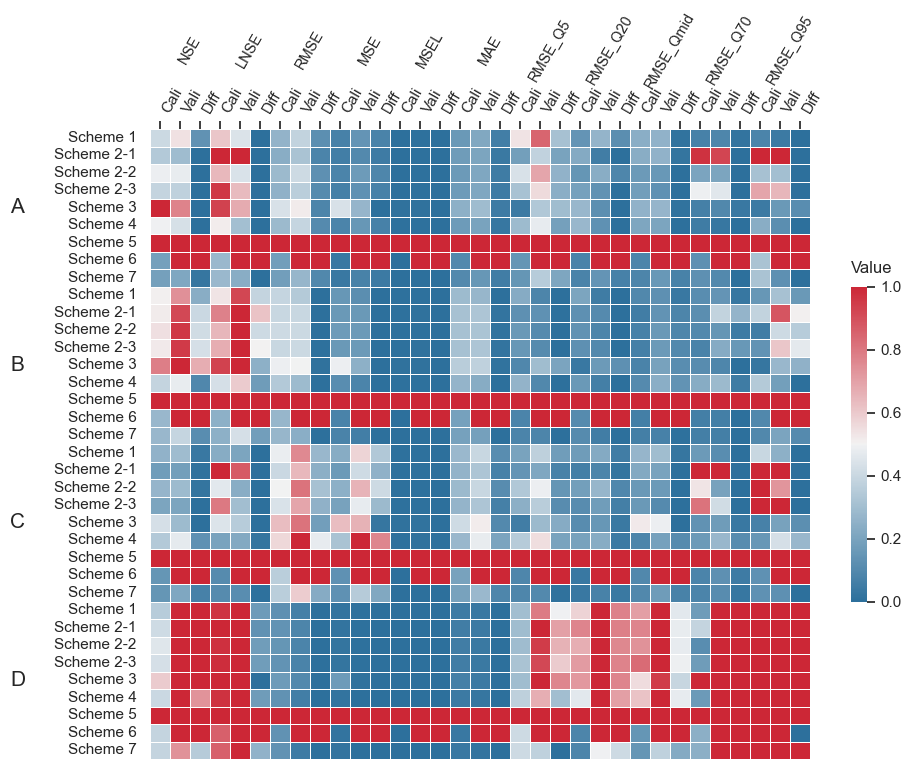

In [6]:
# 设置字体为Arial，大小为20
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 30

# 设置颜色映射，小于0的值显示为深蓝色，大于1的值显示为深红色
cmap = sns.diverging_palette(240, 10, s=85, l=45, n=9, center="light", as_cmap=True)

# 设置绘图风格
sns.set_theme(style="white")

# 创建绘图区域，不使用掩码
f, ax = plt.subplots(figsize=(11, 9))

# 绘制热力图，显示所有数据
sns.heatmap(df, cmap=cmap, vmax=1, vmin=0, center=0.5, 
            yticklabels=y_labels, xticklabels=x_labels,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

# 获取色标对象并设置标题
cbar = ax.collections[0].colorbar
# 在色标的上方添加标题
cbar.ax.set_title('Value', loc='left', pad=10)


# 将x轴标签移至图片上方，并且顺时针旋转30°
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='left')
ax.xaxis.tick_top()  # 将x轴标签移至顶部

# 添加额外的x轴标签
for i, label in enumerate(x2_labels):
    # 计算标签的位置
    label_pos = i * 3 + 2
    # 添加文本标签
    ax.text(label_pos, -4.5, label, ha='center', va='center', fontsize=10.5, rotation=60)

# 添加额外的y轴标签
for i, label in enumerate(y2_labels):
    label_pos = i * 9 + 4.5
    ax.text(-7, label_pos, label, ha='left', va='center', fontsize=15)
    
# 调整子图边距
plt.subplots_adjust(left=0.2, bottom=0.15, top=0.85, right=0.95)

# 保存图片到当前路径，文件名为'4.1_heatmap.png'，分辨率为800 dpi
plt.savefig('4.1_heatmap.png', bbox_inches='tight', dpi=800)

# 显示绘图
plt.show()